# Visualization & Reporting

This notebook generates visualizations for the **Customer Segmentation** project presentation and report. 
It focuses on interpreting the identified clusters (communities) and profiling them based on demographic and behavioral features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style for professional reports
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

## 1. Load Data
Loading the processed dataset with cluster labels.

In [2]:
# Load data (adjust path if running locally different structure)
try:
    df = pd.read_csv('../data/customer_features_with_clusters.csv')
except FileNotFoundError:
    # Fallback if running from root
    df = pd.read_csv('data/customer_features_with_clusters.csv')

# Drop unneeded index columns
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    
print(f"Dataset Shape: {df.shape}")
print("Columns:", df.columns.tolist())
df.head()

Dataset Shape: (14825, 21)
Columns: ['customer_id', 'age', 'income', 'membership_days', 'total_amount', 'transaction_count', 'average_transaction_value', 'offer completed', 'offer received', 'offer viewed', 'completion_rate', 'bogo_completed', 'discount_completed', 'channel_web_count', 'channel_email_count', 'channel_mobile_count', 'channel_social_count', 'gender_F', 'gender_M', 'gender_O', 'cluster']


,customer_id,age,income,membership_days,total_amount,transaction_count,average_transaction_value,offer completed,offer received,offer viewed,...,bogo_completed,discount_completed,channel_web_count,channel_email_count,channel_mobile_count,channel_social_count,gender_F,gender_M,gender_O,cluster
0,0610b486422d4921ae7d2bf64640c50b,55,112000.0,376,77.01,3.0,25.670000,1.0,2.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,True,False,False,0
1,78afa995795e4d85b5d9ceeca43f5fef,75,100000.0,443,159.27,7.0,22.752857,3.0,4.0,4.0,...,3.0,0.0,4.0,7.0,7.0,5.0,True,False,False,3
2,e2127556f4f64592b11af22de27a7932,68,70000.0,91,57.73,3.0,19.243333,2.0,4.0,3.0,...,1.0,1.0,5.0,5.0,5.0,2.0,False,True,False,2
3,389bc3fa690240e798340f5a15918d5c,65,53000.0,167,36.43,3.0,12.143333,5.0,6.0,6.0,...,3.0,2.0,11.0,11.0,11.0,6.0,False,True,False,1
4,2eeac8d8feae4a8cad5a6af0499a211d,58,51000.0,257,15.62,4.0,3.905000,1.0,3.0,2.0,...,0.0,1.0,3.0,3.0,3.0,3.0,False,True,False,0


## 2. Cluster Overview
How are customers distributed across the groups?

C:\Users\wikiepeidia\AppData\Local\Temp\ipykernel_32744\3828341656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='cluster', data=df, palette='viridis')


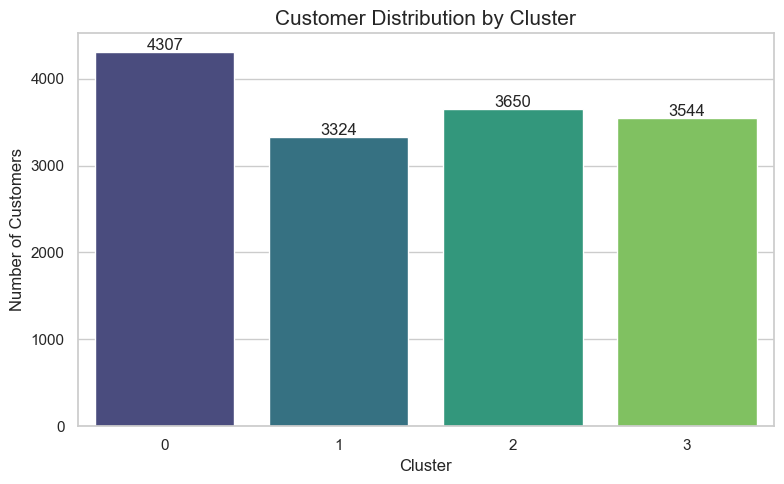

In [3]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='cluster', data=df, palette='viridis')
plt.title('Customer Distribution by Cluster', fontsize=15)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

## 3. Demographic Profiling
Analyzing Age, Income, and Membership duration differences.

C:\Users\wikiepeidia\AppData\Local\Temp\ipykernel_32744\838693034.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='age', data=df, ax=axes[0], palette='viridis')
C:\Users\wikiepeidia\AppData\Local\Temp\ipykernel_32744\838693034.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='income', data=df, ax=axes[1], palette='viridis')
C:\Users\wikiepeidia\AppData\Local\Temp\ipykernel_32744\838693034.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='membership_days', data=df, ax=axes[2], palette='v

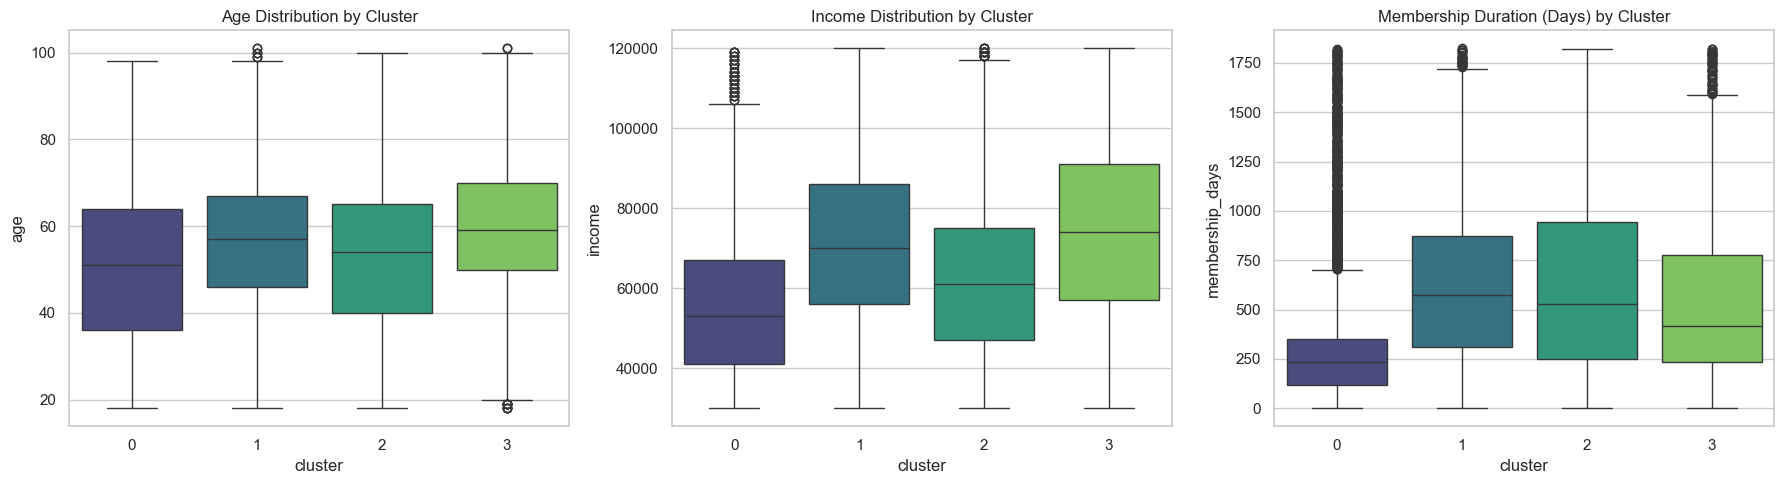

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age Distribution
sns.boxplot(x='cluster', y='age', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Age Distribution by Cluster')

# Income Distribution
sns.boxplot(x='cluster', y='income', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Income Distribution by Cluster')

# Membership Days
sns.boxplot(x='cluster', y='membership_days', data=df, ax=axes[2], palette='viridis')
axes[2].set_title('Membership Duration (Days) by Cluster')

plt.tight_layout()
plt.show()

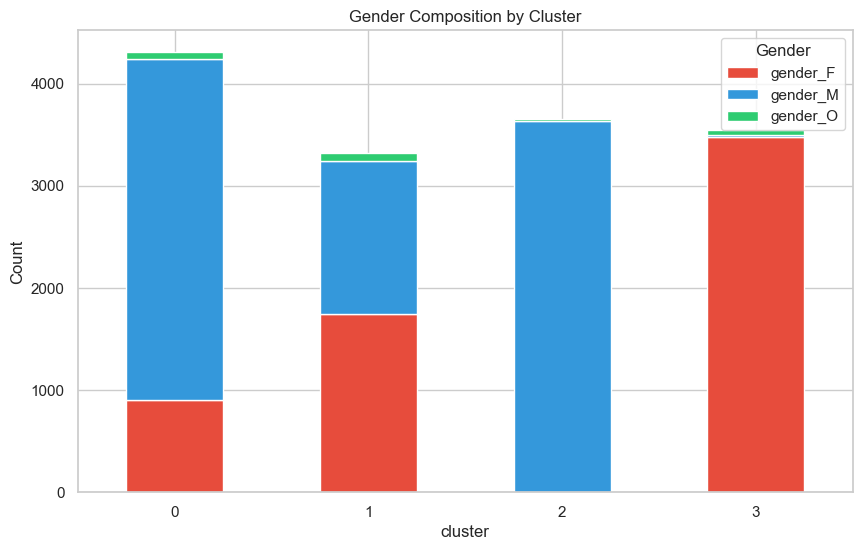

In [5]:
# Gender Breakdown
# Reverse one-hot encoding for simpler visualization if needed, or plotting sums
gender_cols = ['gender_F', 'gender_M', 'gender_O']
gender_data = df.groupby('cluster')[gender_cols].sum()

gender_data.plot(kind='bar', stacked=True, color=['#e74c3c', '#3498db', '#2ecc71'], figsize=(10, 6))
plt.title('Gender Composition by Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

## 4. Behavioral Profiling
Spending habits and engagement levels.

C:\Users\wikiepeidia\AppData\Local\Temp\ipykernel_32744\432238931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cluster', y='total_amount', data=df, ax=axes[0, 0], palette='viridis')
C:\Users\wikiepeidia\AppData\Local\Temp\ipykernel_32744\432238931.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='transaction_count', data=df, ax=axes[0, 1], palette='viridis')
C:\Users\wikiepeidia\AppData\Local\Temp\ipykernel_32744\432238931.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='average_transaction

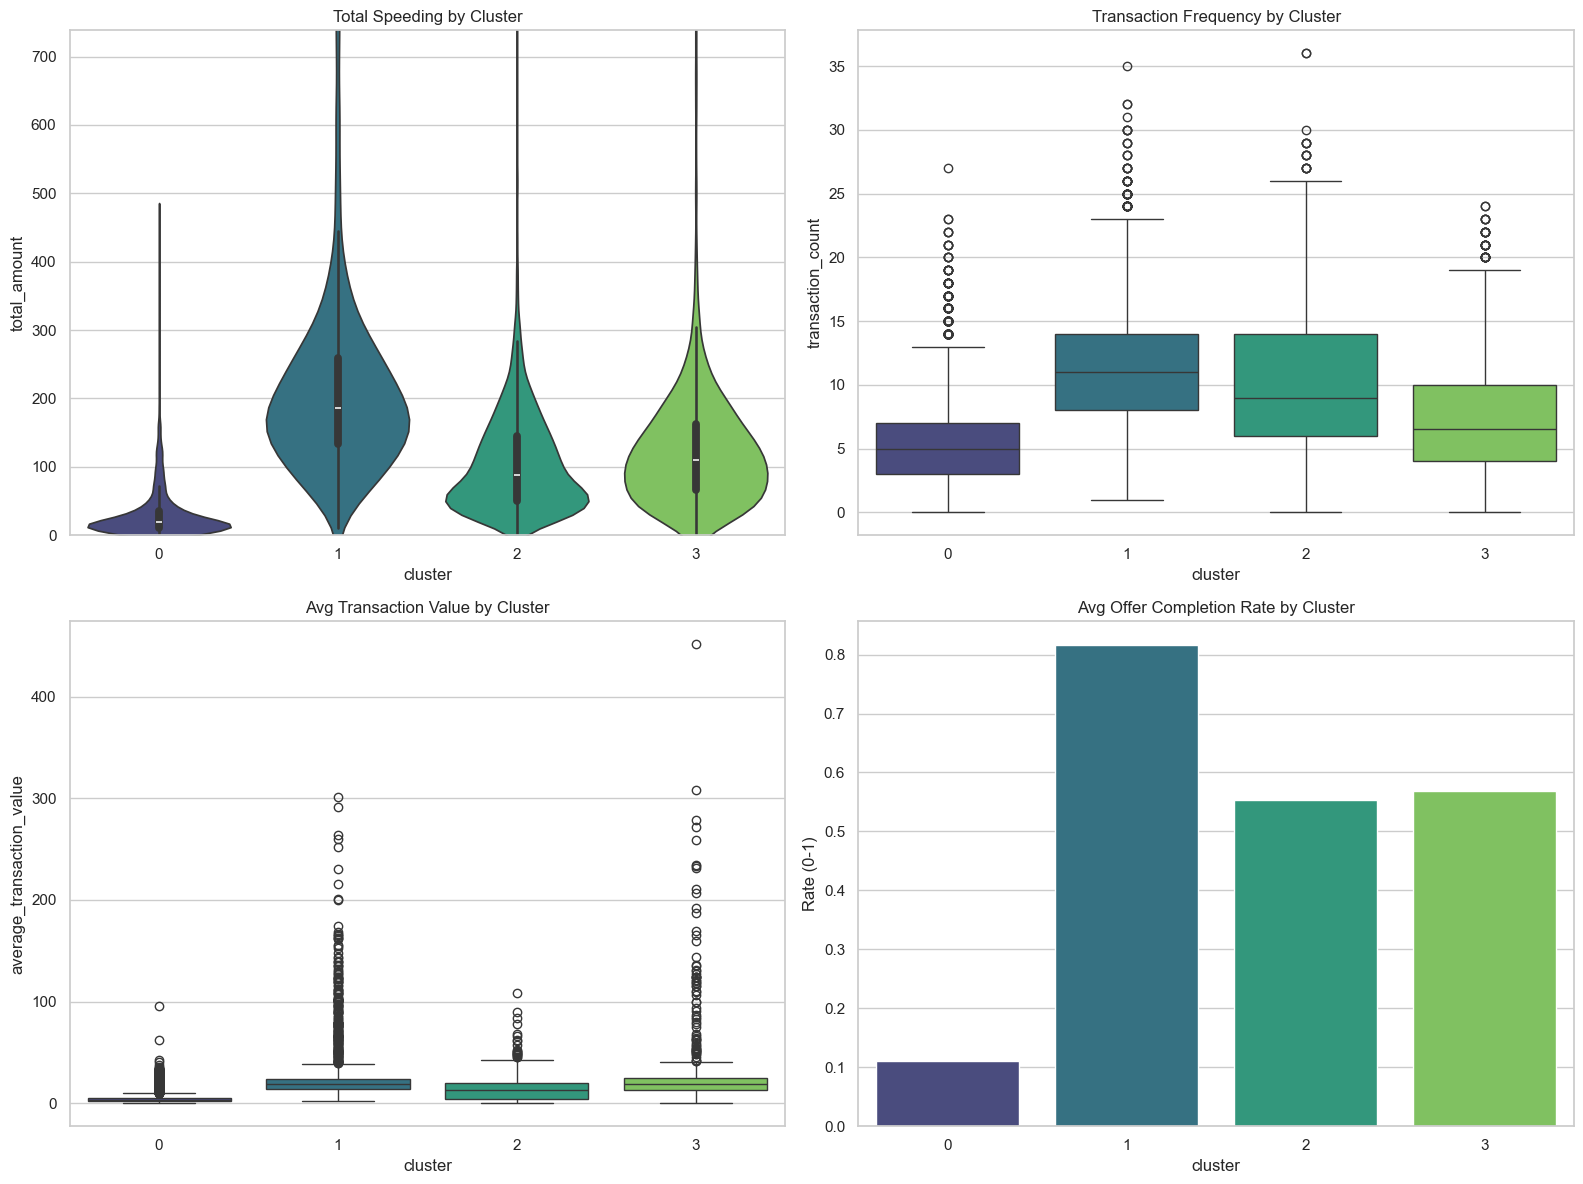

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total Amount
sns.violinplot(x='cluster', y='total_amount', data=df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Total Speeding by Cluster')
# Limit y-axis if there are extreme outliers for better readability
axes[0, 0].set_ylim(0, df['total_amount'].quantile(0.99))

# Transaction Count
sns.boxplot(x='cluster', y='transaction_count', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Transaction Frequency by Cluster')

# Average Transaction Value
sns.boxplot(x='cluster', y='average_transaction_value', data=df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Avg Transaction Value by Cluster')

# Offer Completion Rate
sns.barplot(x='cluster', y='completion_rate', data=df, ax=axes[1, 1], palette='viridis', ci=None)
axes[1, 1].set_title('Avg Offer Completion Rate by Cluster')
axes[1, 1].set_ylabel('Rate (0-1)')

plt.tight_layout()
plt.show()

## 5. Offer Type Preferences
Do clusters prefer BOGO or Discounts?

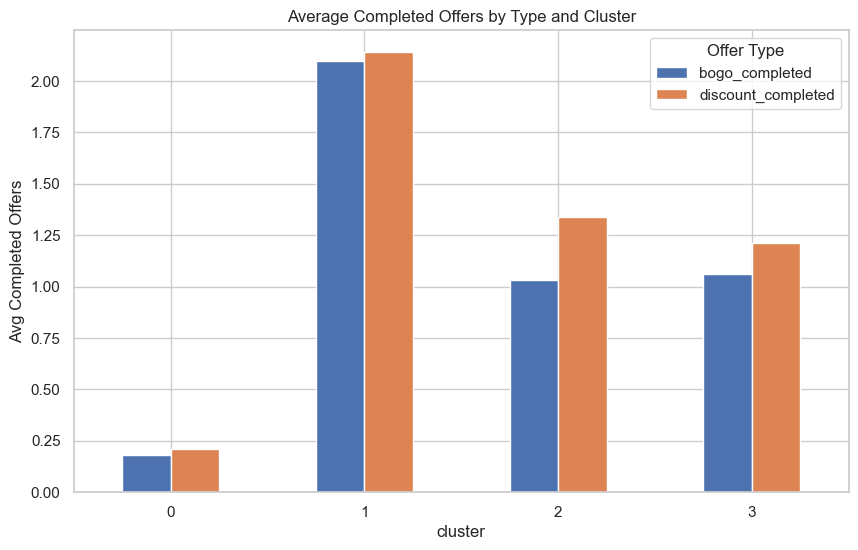

In [7]:
# Aggregating offer completions
offer_types = df.groupby('cluster')[['bogo_completed', 'discount_completed']].mean()

offer_types.plot(kind='bar', figsize=(10, 6))
plt.title('Average Completed Offers by Type and Cluster')
plt.ylabel('Avg Completed Offers')
plt.xticks(rotation=0)
plt.legend(title='Offer Type')
plt.show()